In [154]:
import numpy as np
import yfinance as yf
import datetime
import pandas as pd
from pdb import set_trace

In [8]:
msft = yf.Ticker("MSFT")

In [ ]:
msft.info

In [139]:
syms = ["AAPL","TSLA","SPY"]

In [152]:
data = yf.download(syms,interval="1m", group_by = 'ticker',start="2021-12-01", end="2021-12-05")

[*********************100%***********************]  3 of 3 completed


In [155]:
def to_singleindex(df):
    temp = df.copy()
    syms = np.unique([multiind[0] for multiind in data.columns])
    for sym in syms:
        temp2 = data[sym].assign(sym= sym)
        if sym == syms[0]:
            temp1= temp2
        else:
            temp1 = pd.concat((temp1,temp2))
    return(temp1)

In [157]:
dat = to_singleindex(data)

In [167]:
dat = dat.reset_index()

In [190]:
dat = dat.assign(time = [datet.strftime("%H:%M") for datet in dat.Datetime],
                date = [datet.strftime("%D") for datet in dat.Datetime])

In [228]:
dat['time'] = [dat.Datetime[i].time() for i in range(dat.shape[0])]

In [246]:
time(11, 34, 56)

Wall time: 0 ns


(11, 34, 56)

In [ ]:
 > dat.Datetime[0].time()

In [238]:
datetime.time(9, 30)

TypeError: descriptor 'time' for 'datetime.datetime' objects doesn't apply to a 'int' object

In [234]:
dat.loc[dat.time > datetime.time(9,25)]

TypeError: descriptor 'time' for 'datetime.datetime' objects doesn't apply to a 'int' object

In [211]:
dat['time']

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (Temp/ipykernel_6056/1658399713.py, line 1)

<AxesSubplot:xlabel='time'>

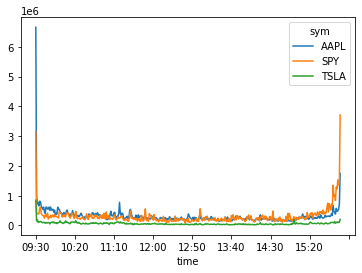

In [200]:
dat.groupby(['time','sym'])['Volume'].mean().unstack().plot()

In [178]:
from datetime import datetime

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 15:47:28


In [171]:
datetime.datetime.strptime(dat.Datetime, "%m/%j/%y %H:%M")

TypeError: strptime() argument 1 must be str, not Series

In [ ]:
dat.groupby(['sym','Datetime'])['Open']

In [ ]:
for sym in syms:
    temp = data[sym]
    temp['sym'] = sym
    

In [ ]:
data

AttributeError: 'DataFrame' object has no attribute 'Datetime'

In [ ]:
data.groupby('Datetime').mean()

We could potentially buy whenever the price is down a couple % off from its 15 day average/high

In [35]:
data[('High', 'AAPL')].plot()
data[('Low', 'AAPL')].plot()

KeyError: ('High', 'AAPL')

<AxesSubplot:xlabel='Date'>

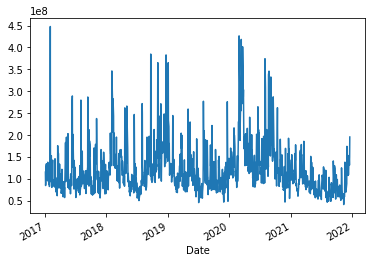

In [23]:
data[('Volume', 'AAPL')].plot()